# Logistic Regression Assignment

## Importing the libraries

In [530]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Cost Functions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Scalers
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

## Importing & exploring the dataset 

In [240]:
dataset = sns.load_dataset("tips")

In [241]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [242]:
dataset.shape

(244, 7)

In [243]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [244]:
dataset.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [245]:
dataset.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [246]:
dataset.describe(exclude=[np.number])

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


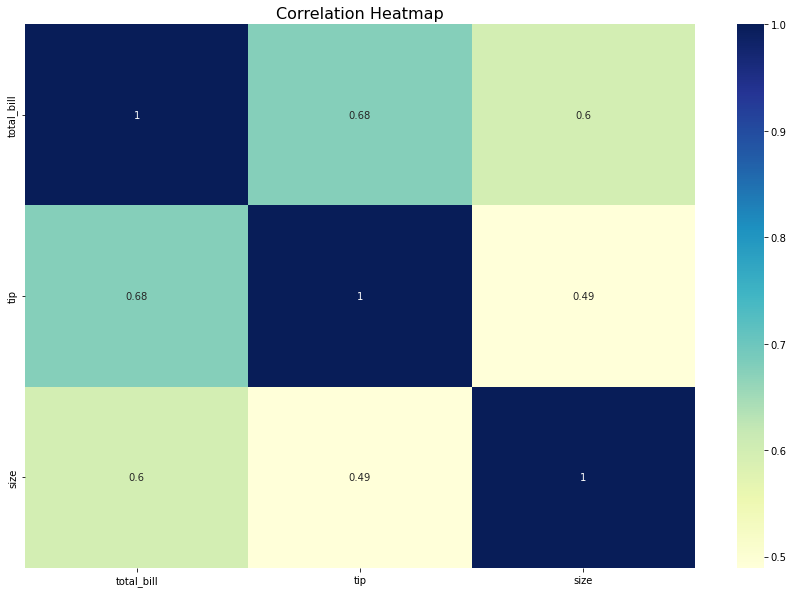

In [247]:
# Set the width and height of the figure
plt.figure(figsize=(15,10))
# Add title
plt.title("Correlation Heatmap", size=16)
sns.heatmap(dataset.corr(), annot=True, cmap="YlGnBu")
#plt.savefig("corr_heatmap.png", format="png", dpi=1200)
plt.show()

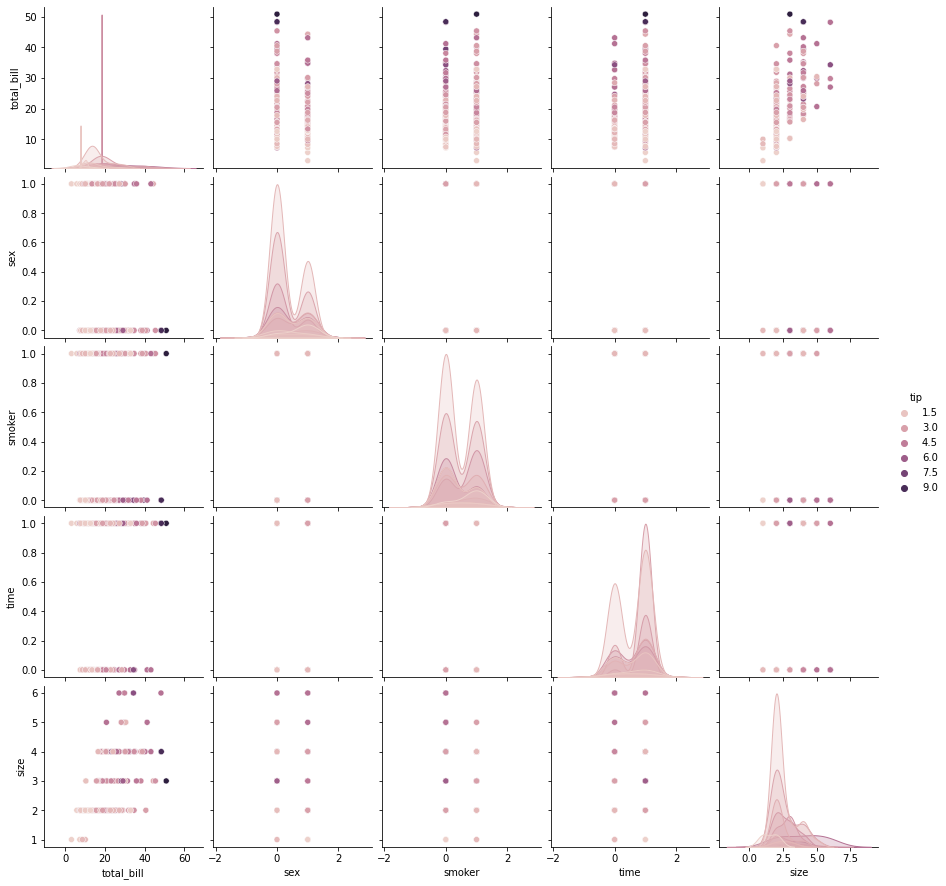

In [295]:
sns.pairplot(dataset, hue='tip')

In [248]:
dataset['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [249]:
dataset['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

# Preprocessing

In [250]:
df = dataset

In [251]:
df["sex"] = np.where(df["sex"] == "Male", 0, 1)
df['sex']

0      1
1      0
2      0
3      0
4      1
      ..
239    0
240    1
241    0
242    0
243    1
Name: sex, Length: 244, dtype: int32

In [252]:
df["smoker"] = np.where(df["smoker"] == "No", 0, 1)
df['smoker']

0      0
1      0
2      0
3      0
4      0
      ..
239    0
240    1
241    1
242    0
243    0
Name: smoker, Length: 244, dtype: int32

In [253]:
df["time"] = np.where(df["time"] == "Lunch", 0, 1)
df['time']

0      1
1      1
2      1
3      1
4      1
      ..
239    1
240    1
241    1
242    1
243    1
Name: time, Length: 244, dtype: int32

In [254]:
# Create our One Hot Encoder object
one_hot = OneHotEncoder()

col_names = ["day"]

one_hot_df = one_hot.fit_transform(df[col_names]).toarray()

In [255]:
# Look at the categories
one_hot.categories_

[array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object)]

In [256]:
one_hot_df

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],


In [257]:
def col_names(one_hot_model):
    
    "Create columns names list for one hot encoded feature"
    
    column_names = []
    
    col_names = ["day"]

    for y in range(len(one_hot_model.categories_)):
        for z in range(len(one_hot_model.categories_[y])):
            column_names.append(col_names[y]+"_"+one_hot_model.categories_[y][z])
            
    return column_names

column_names = col_names(one_hot)

In [258]:
one_hot_df.shape

(244, 4)

In [259]:
# Cast One Hot Encoded values into a dataframe

oh_df = pd.DataFrame(
    one_hot_df,
    index=df.index,
    columns = column_names
)

print(oh_df.shape)

(244, 4)


In [260]:
df.shape

(244, 7)

In [502]:
# Create new_df by merging df and one hot encoded df together and drop day col
df_new = df.join(oh_df).drop(["day"], axis=1)
df_new

,total_bill,tip,sex,smoker,time,size,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.01,1,0,1,2,0.0,0.0,1.0,0.0
1,10.34,1.66,0,0,1,3,0.0,0.0,1.0,0.0
2,21.01,3.50,0,0,1,3,0.0,0.0,1.0,0.0
3,23.68,3.31,0,0,1,2,0.0,0.0,1.0,0.0
4,24.59,3.61,1,0,1,4,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,1,3,0.0,1.0,0.0,0.0
240,27.18,2.00,1,1,1,2,0.0,1.0,0.0,0.0
241,22.67,2.00,0,1,1,2,0.0,1.0,0.0,0.0
242,17.82,1.75,0,0,1,2,0.0,1.0,0.0,0.0


In [418]:
print(df_new.shape)

(244, 10)


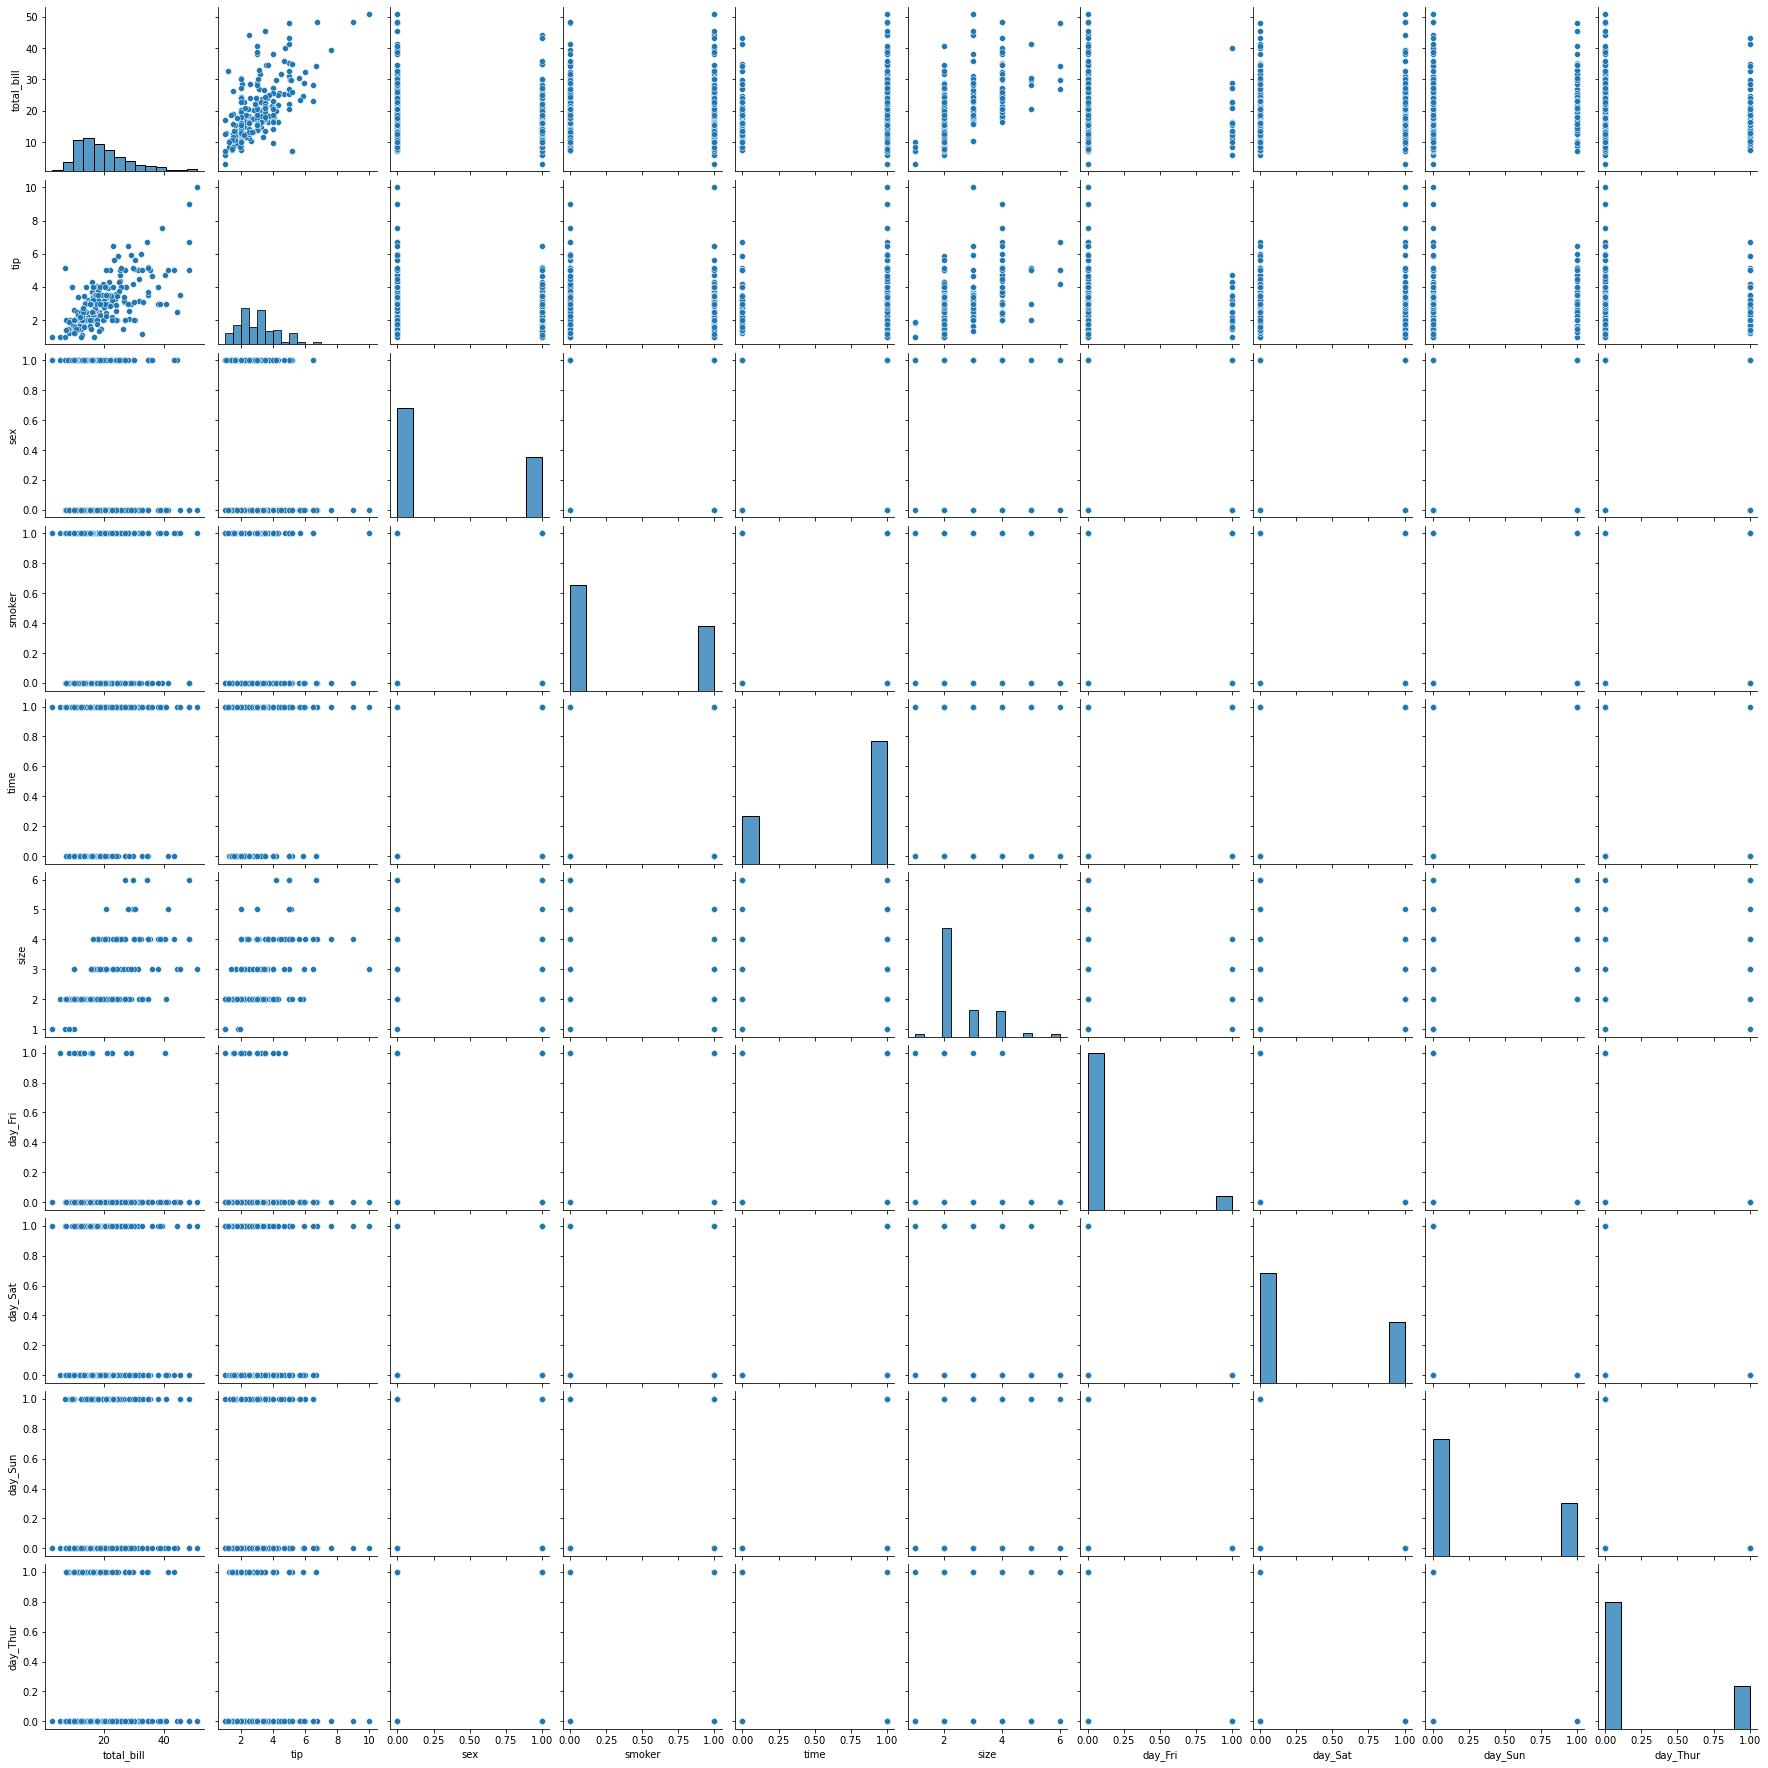

In [419]:
sns.pairplot(df_new)

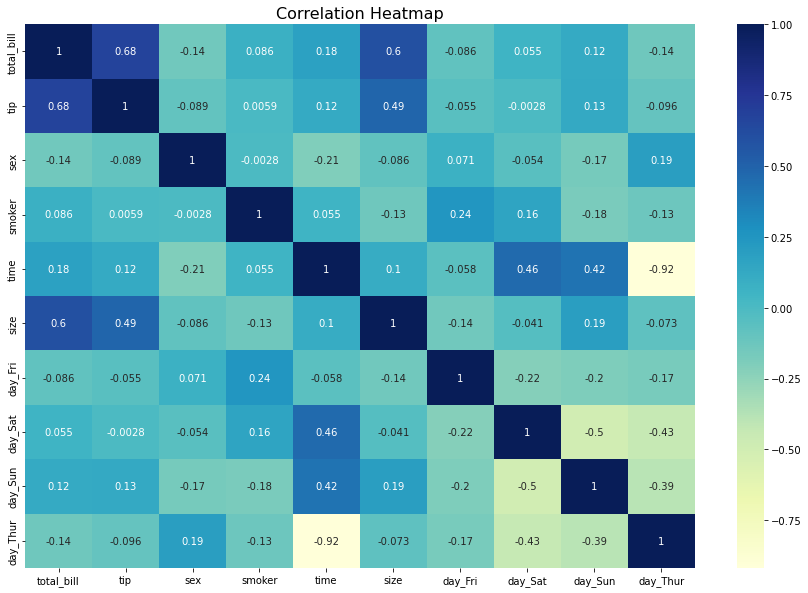

In [420]:
# Set the width and height of the figure
plt.figure(figsize=(15,10))
# Add title
plt.title("Correlation Heatmap", size=16)
sns.heatmap(df_new.corr(), annot=True, cmap="YlGnBu")
#plt.savefig("corr_heatmap.png", format="png", dpi=1200)
plt.show()

In [503]:
df_new['tip_value'] = df_new['tip']
df_new['tip_value']

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip_value, Length: 244, dtype: float64

In [504]:
df_new['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [505]:
# from the description above I decided to put these numbers
"""
Bad Tipper < 2.0
Good Tipper >= 2.0 & Good Tipper < 3.26
Excellent Tipper >= 3.26
"""

'\nBad Tipper < 2.0\nGood Tipper >= 2.0 & Good Tipper < 3.26\nExcellent Tipper >= 3.26\n'

In [506]:
# Defining all the conditions inside a function
def condition(x):
    if x< 2.0:
        return "Bad"
    elif x>=2.0 and x< 3.26:
        return "Good"
    else:
        return 'Excellent'
 
# Applying the conditions
df_new['tip'] = df_new['tip'].apply(condition)
df_new['tip']

0            Bad
1            Bad
2      Excellent
3      Excellent
4      Excellent
         ...    
239    Excellent
240         Good
241         Good
242          Bad
243         Good
Name: tip, Length: 244, dtype: object

In [507]:
# Note: I'm only selecting the size and total_tip columns from the dataset

# feature set --> one or more than one column 
X = df_new.loc[:, ['total_bill','size']] # --> give me all the rows and columns 'total_bill' and 'size'

# target set --> one column
# target set --> tip column
y = df_new.iloc[:, 1]

In [508]:
X.head()

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4


In [509]:
y.head()

0          Bad
1          Bad
2    Excellent
3    Excellent
4    Excellent
Name: tip, dtype: object

In [510]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    object 
 2   sex         244 non-null    int32  
 3   smoker      244 non-null    int32  
 4   time        244 non-null    int32  
 5   size        244 non-null    int64  
 6   day_Fri     244 non-null    float64
 7   day_Sat     244 non-null    float64
 8   day_Sun     244 non-null    float64
 9   day_Thur    244 non-null    float64
 10  tip_value   244 non-null    float64
dtypes: float64(6), int32(3), int64(1), object(1)
memory usage: 18.2+ KB


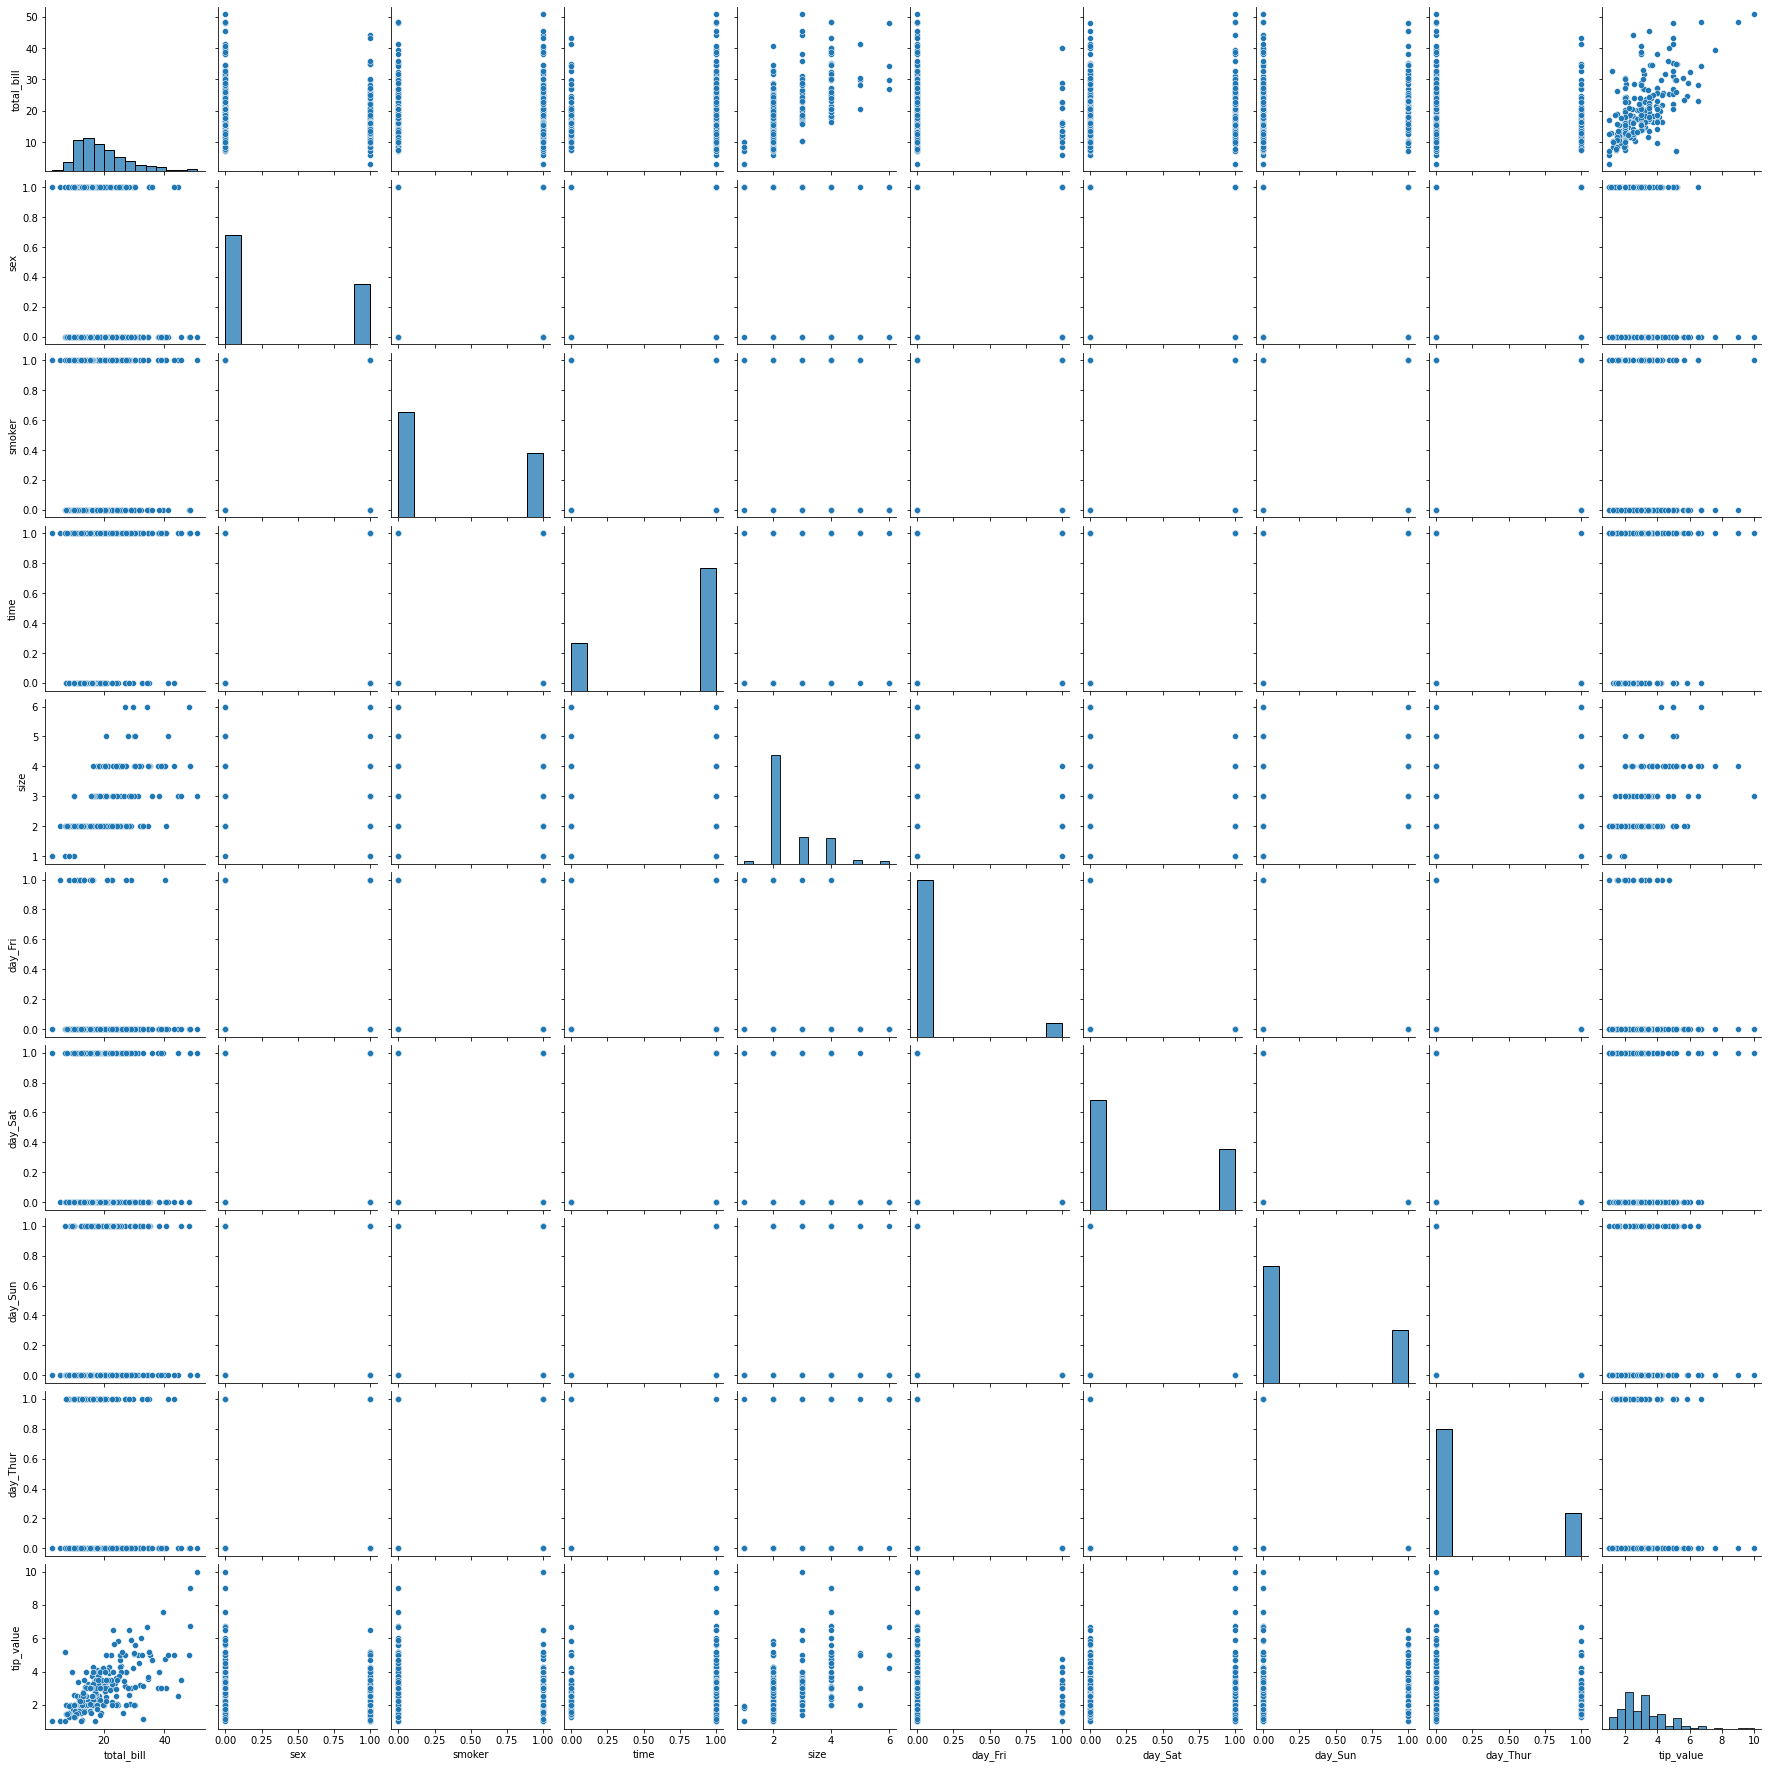

In [475]:
sns.pairplot(df_new)

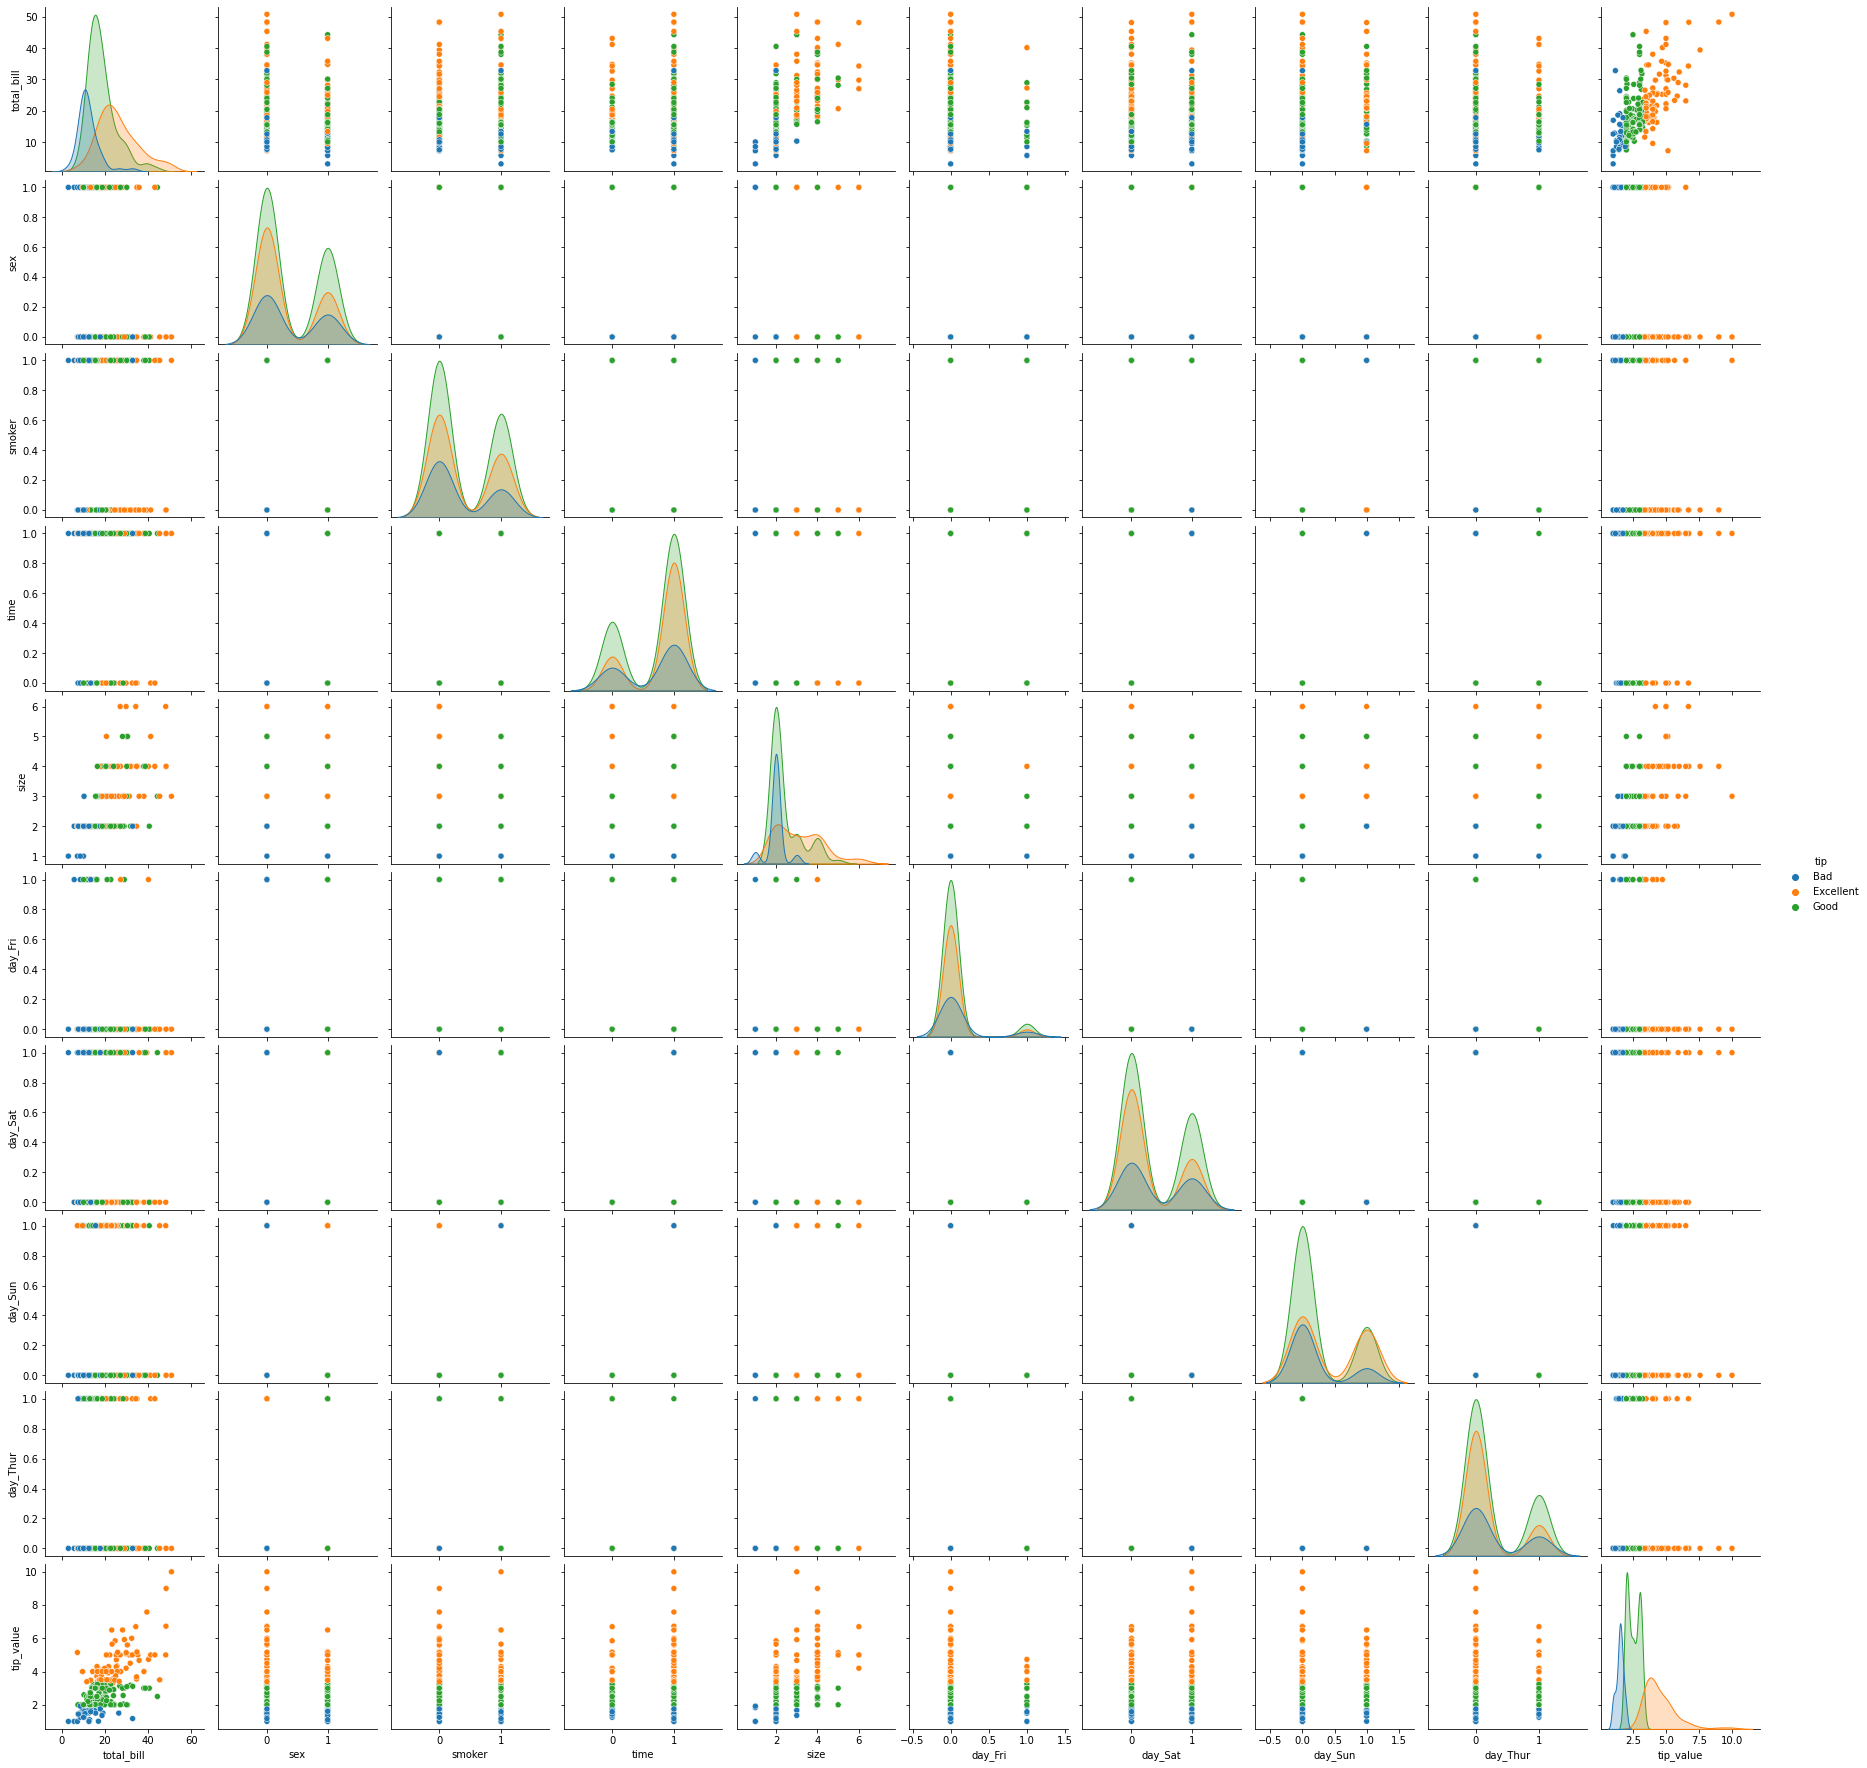

In [476]:
sns.pairplot(df_new, hue='tip')

In [511]:
df_new.tip.value_counts()

Good         118
Excellent     81
Bad           45
Name: tip, dtype: int64

# Logistic Regression Model

### Splitting the dataset into the Training set and Test set

In [701]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [702]:

classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Predicting a new result

In [703]:
# Note: Predicting the tip category if the total_bill: $12 and size 2

print(classifier.predict(sc.transform([[12,2]])))

['Bad']


### Predicting the Test set results

In [704]:
y_pred = classifier.predict(X_test)

print(y_pred)

['Good' 'Good' 'Good' 'Bad' 'Good' 'Bad' 'Good' 'Good' 'Good' 'Excellent'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Excellent' 'Bad' 'Good' 'Good' 'Good'
 'Excellent' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Excellent'
 'Excellent' 'Good' 'Good' 'Good' 'Good' 'Bad' 'Good' 'Good' 'Good' 'Bad'
 'Excellent' 'Good' 'Bad' 'Good' 'Good' 'Excellent' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Excellent' 'Excellent' 'Good' 'Good' 'Excellent' 'Bad'
 'Good' 'Excellent' 'Good' 'Good' 'Good' 'Good']


In [705]:
test_dataset = pd.DataFrame(X_test, columns= ['total_bill','size'])

test_dataset['Actual_Tip'] = y_test.to_numpy()
test_dataset['Predict_Tip'] = y_pred

test_dataset

,total_bill,size,Actual_Tip,Predict_Tip
64,17.59,3,Good,Good
63,18.29,4,Excellent,Good
55,19.49,2,Excellent,Good
111,7.25,1,Bad,Bad
225,16.27,2,Good,Good
...,...,...,...,...
116,29.93,4,Excellent,Excellent
33,20.69,4,Good,Good
122,14.26,2,Good,Good
161,12.66,2,Good,Good


In [706]:
# Counting the records when the actual and the predicitons are the same

(test_dataset['Actual_Tip'] == test_dataset['Predict_Tip']).value_counts()

True     39
False    22
dtype: int64

### Making the Confusion Matrix

In [707]:
cm = confusion_matrix(y_test, y_pred)

cm

array([[ 5,  0,  5],
       [ 1,  9, 13],
       [ 1,  2, 25]], dtype=int64)

### Making a more detailed confusion matrix

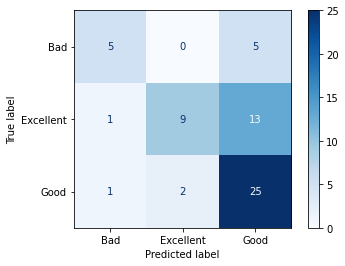

In [708]:
plot_confusion_matrix(classifier, X=X_test, y_true=y_test, cmap='Blues')

In [709]:
classifier.score(X_test, y_test)

0.639344262295082

In [710]:
# Calculate Accuracy

(sum(test_dataset['Actual_Tip'] == test_dataset['Predict_Tip']) / len(test_dataset))

0.639344262295082

# Linear Regression Model

In [678]:
y1 = df_new.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.25, random_state = 0)

In [679]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# This return the R^2 score 
lr.score(X_test, y_test)

0.5540300332350392

In [680]:
# Predict on Test Data

preds = lr.predict(X_test)

# y_test --> the actual values from the test set
# preds --> the predictions using the X_test "features" in the test set
mean_absolute_error(y_test, preds)

0.688936026065263

In [681]:
lr.intercept_

0.6212870759614582

In [682]:
lr.coef_

array([0.08282792, 0.26218852])

In [683]:
y_pred = lr.predict(X_test)

test_dataset2 = pd.DataFrame(X_test, columns= ['total_bill','size'])

test_dataset2['Actual_Tip'] = y_test.to_numpy()
test_dataset2['Predict_Tip'] = y_pred

test_dataset2

,total_bill,size,Actual_Tip,Predict_Tip
64,17.59,3,2.64,2.864796
63,18.29,4,3.76,3.184964
55,19.49,2,3.51,2.759980
111,7.25,1,1.00,1.483978
225,16.27,2,2.50,2.493274
...,...,...,...,...
116,29.93,4,5.07,4.149081
33,20.69,4,2.45,3.383751
122,14.26,2,2.50,2.326790
161,12.66,2,2.50,2.194266


In [684]:
tolerance = np.zeros(len(test_dataset2))
tolerance_TorF = np.zeros(len(test_dataset2))

#this for loop is to check whether the Predict_Tip is in the range of the Actual_Tip
#so that I can create a new column with:
#Actual_Tip if the Predict_Tip is in its range 
#Predict_Tip if the Predict_Tip is NOT in its range 

for i in range(len(test_dataset2)):
    
    lower = round(test_dataset2.iloc[i]['Actual_Tip'] * 0.9, 2)
    upper = round(test_dataset2.iloc[i]['Actual_Tip'] * 1.1, 2)
    
    
    if (round(test_dataset2.iloc[i]['Predict_Tip'],2) >= lower):
        if (round(test_dataset2.iloc[i]['Predict_Tip'],2) <= upper):
            tolerance[i] = test_dataset2.iloc[i]['Actual_Tip']
            tolerance_TorF[i] = True
        else:
            tolerance[i] = round(test_dataset2.iloc[i]['Predict_Tip'], 2)
            tolerance_TorF[i] = False
            
    else:
        tolerance[i] = round(test_dataset2.iloc[i]['Predict_Tip'], 2)
        tolerance_TorF[i] = False

        
test_dataset2['Tip_Toleranced'] = tolerance

# new column to check whether the Predict_Tip is in the range of the Actual_Tip
test_dataset2['tolerance_TorF'] = tolerance_TorF

test_dataset2

,total_bill,size,Actual_Tip,Predict_Tip,Tip_Toleranced,tolerance_TorF
64,17.59,3,2.64,2.864796,2.64,1.0
63,18.29,4,3.76,3.184964,3.18,0.0
55,19.49,2,3.51,2.759980,2.76,0.0
111,7.25,1,1.00,1.483978,1.48,0.0
225,16.27,2,2.50,2.493274,2.50,1.0
...,...,...,...,...,...,...
116,29.93,4,5.07,4.149081,4.15,0.0
33,20.69,4,2.45,3.383751,3.38,0.0
122,14.26,2,2.50,2.326790,2.50,1.0
161,12.66,2,2.50,2.194266,2.19,0.0


In [691]:
#checking the Prediction correctness
Linear_Regression_tolerance_TorF = test_dataset2['tolerance_TorF'].value_counts()
Linear_Regression_tolerance_TorF

0.0    46
1.0    15
Name: tolerance_TorF, dtype: int64

In [688]:
# Calculate Accuracy after applying the tolerance

Linear_Regression_Accuracy = (sum(test_dataset2['Actual_Tip'] == test_dataset2['Tip_Toleranced']) / len(test_dataset2))
Linear_Regression_Accuracy

0.2459016393442623

# Results

In [712]:
print(f'Logistic Regression Model Accuracy: {classifier.score(X_test, y_test)}')

print('Logistic Regression Model: ')
print((test_dataset['Actual_Tip'] == test_dataset['Predict_Tip']).value_counts())


Logistic Regression Model Accuracy: 0.639344262295082
Logistic Regression Model: 
True     39
False    22
dtype: int64


In [700]:
print(f'Linear Regression Model Accuracy: {lr.score(X_test, y_test)}')  
print(f'Linear Regression Model Accuracy (after applying the tolerance): {Linear_Regression_Accuracy}') 

print('Linear Regression Model\'s falses(0) and trues(1) (after applying the tolerance): ')
Linear_Regression_tolerance_TorF


Linear Regression Model Accuracy: 0.5540300332350392
Linear Regression Model Accuracy (after applying the tolerance): 0.2459016393442623
Linear Regression Model's falses(0) and trues(1) (after applying the tolerance): 


0.0    46
1.0    15
Name: tolerance_TorF, dtype: int64

## The Logistic Regression Model result is better than the Linear Regression Models.